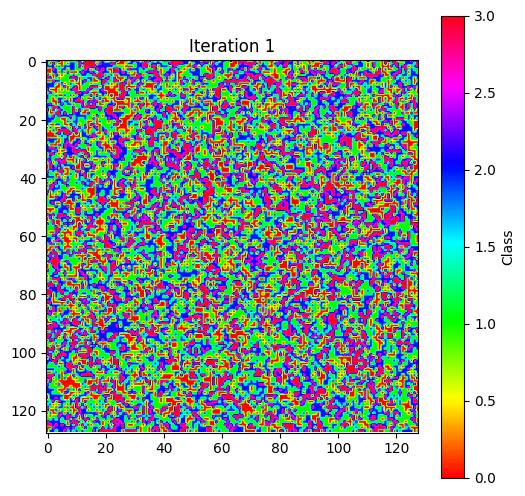

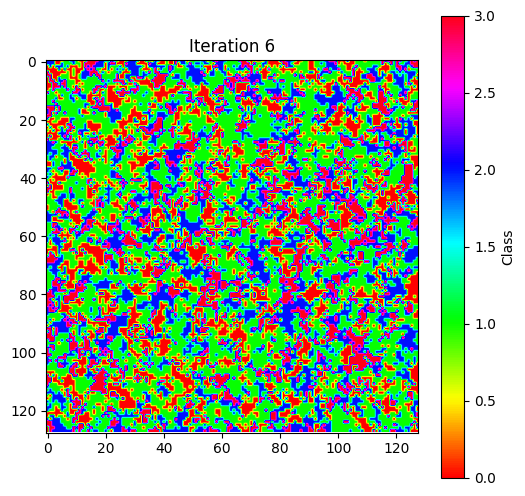

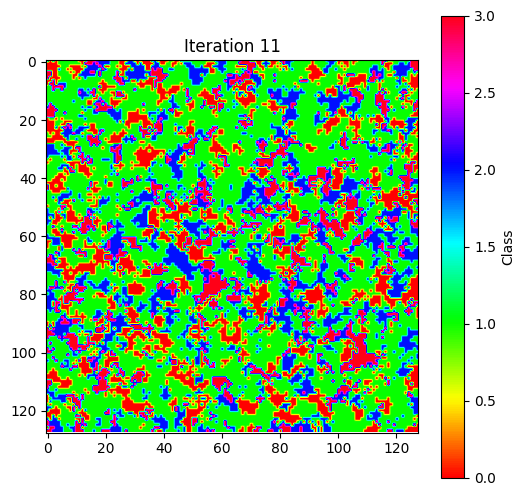

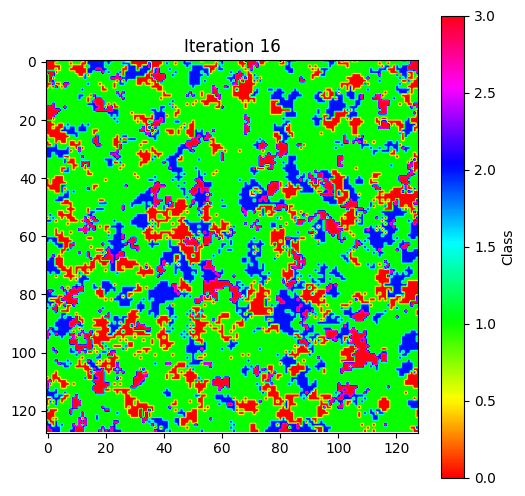

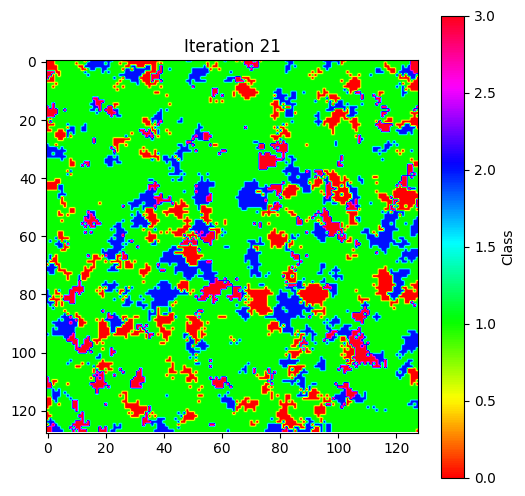

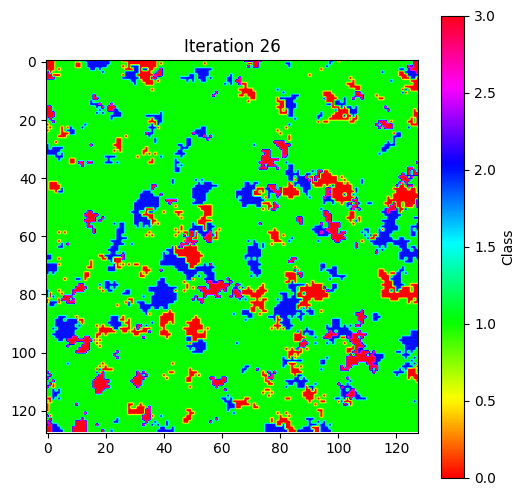

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define constants
GRID_SIZE = 128
NUM_CLASSES = 4
NUM_ITERATIONS = 30

# Initialize a random grid with 4 classes
grid = np.random.randint(0, NUM_CLASSES, (GRID_SIZE, GRID_SIZE))

# Define transition probabilities (Markov matrix)
# Rows represent current state, columns represent next state
transition_matrix = np.array([
    [0.6, 0.2, 0.1, 0.1],  # Class 0 transitions
    [0.1, 0.7, 0.1, 0.1],  # Class 1 transitions
    [0.2, 0.1, 0.6, 0.1],  # Class 2 transitions
    [0.1, 0.1, 0.2, 0.6],  # Class 3 transitions
])

# Normalize transition matrix (to handle any rounding issues)
transition_matrix = transition_matrix / transition_matrix.sum(axis=1, keepdims=True)

# Define a neighborhood kernel for cellular automata
def get_neighbors(grid, x, y):
    """Get the neighborhood values of a cell, including itself."""
    neighborhood = grid[max(0, x-1):x+2, max(0, y-1):y+2]
    return neighborhood.flatten()

# Cellular Automata update function
def update_cell(current_class, neighbors):
    """Update the cell class based on neighborhood influence and Markov transition."""
    class_counts = np.bincount(neighbors, minlength=NUM_CLASSES)
    influence = class_counts / class_counts.sum()

    # Combine neighborhood influence with Markov probabilities
    combined_probabilities = transition_matrix[current_class] * influence
    combined_probabilities /= combined_probabilities.sum()  # Normalize

    # Choose the new state based on probabilities
    return np.random.choice(np.arange(NUM_CLASSES), p=combined_probabilities)

# Run CA-Markov simulation
for iteration in range(NUM_ITERATIONS):
    new_grid = np.copy(grid)
    for i in range(GRID_SIZE):
        for j in range(GRID_SIZE):
            neighbors = get_neighbors(grid, i, j)
            new_grid[i, j] = update_cell(grid[i, j], neighbors)

    grid = new_grid
    
    
    if iteration % 5 == 0:
        # Plot the grid at each iteration
        plt.figure(figsize=(6, 6))
        plt.title(f"Iteration {iteration + 1}")
        plt.imshow(grid, cmap='hsv', vmin=0, vmax=NUM_CLASSES - 1)
        plt.colorbar(label="Class")
        plt.show()


Confusion Matrix:
 [[456 183  73]
 [117  57  14]
 [ 57  33  10]]

Transition Matrix (Normalized):
 [[0.64044944 0.25702247 0.10252809]
 [0.62234043 0.30319149 0.07446809]
 [0.57       0.33       0.1       ]]


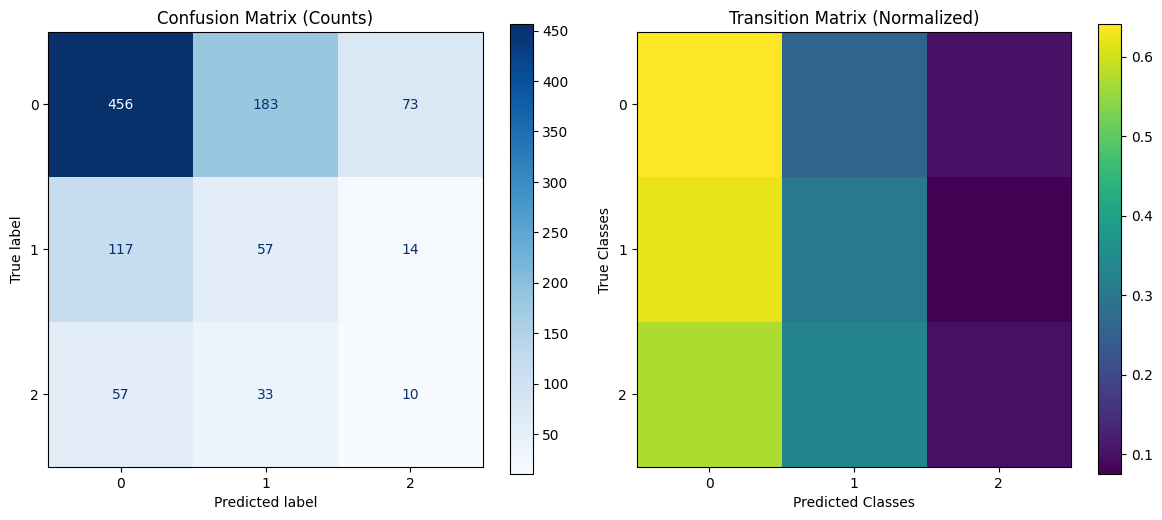

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Simulate unbalanced y_true and y_pred
np.random.seed(42)
y_true = np.random.choice([0, 1, 2], size=1000, p=[0.7, 0.2, 0.1])  # Class 0 is dominant
y_pred = np.random.choice([0, 1, 2], size=1000, p=[0.65, 0.25, 0.1])  # Predicted with slight bias

# Create confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Normalize the confusion matrix row-wise to obtain the transition matrix
transition_matrix = conf_matrix.astype(float) / conf_matrix.sum(axis=1, keepdims=True)

print("\nTransition Matrix (Normalized):\n", transition_matrix)

# Plotting the confusion matrix and transition matrix for visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Confusion Matrix
ConfusionMatrixDisplay(conf_matrix, display_labels=[0, 1, 2]).plot(ax=axes[0], cmap="Blues")
axes[0].set_title("Confusion Matrix (Counts)")

# Normalized Transition Matrix Heatmap
im = axes[1].imshow(transition_matrix, cmap="viridis")
axes[1].set_title("Transition Matrix (Normalized)")
axes[1].set_xticks([0, 1, 2])
axes[1].set_yticks([0, 1, 2])
axes[1].set_xticklabels([0, 1, 2])
axes[1].set_yticklabels([0, 1, 2])
plt.colorbar(im, ax=axes[1])
axes[1].set_xlabel("Predicted Classes")
axes[1].set_ylabel("True Classes")

plt.tight_layout()
plt.show()
